# bnlearn

In [1]:
import bnlearn as bn

## Instalación

Se siguienron los pasos de la página https://erdogant.github.io/bnlearn/pages/html/Quickstart.html, 

``
conda create -n env_bnlearn python=3.8``

``conda activate env_bnlearn``

``pip install bnlearn``

## Primer ejemplo

El evento de que el pasto esté mojado (`Wet_Grass=1` tiene dos posibles causas: ya sea que se encendió el aspersor (`Sprinkler=1`), o que llovió (`Rain=1`).

El evento de que esté nublado (`Cloudy=1`), hace que sea más probable que esté lloviendo y no se esté usando el aspersor.

In [2]:
df = bn.import_example()
df

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


In [3]:
model = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [4]:
model = bn.independence_test(model, df)

[bnlearn] >Compute edge strength with [chi_square]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Warning: [graphviz_layout] layout not found. The layout [spring_layout] is used instead.


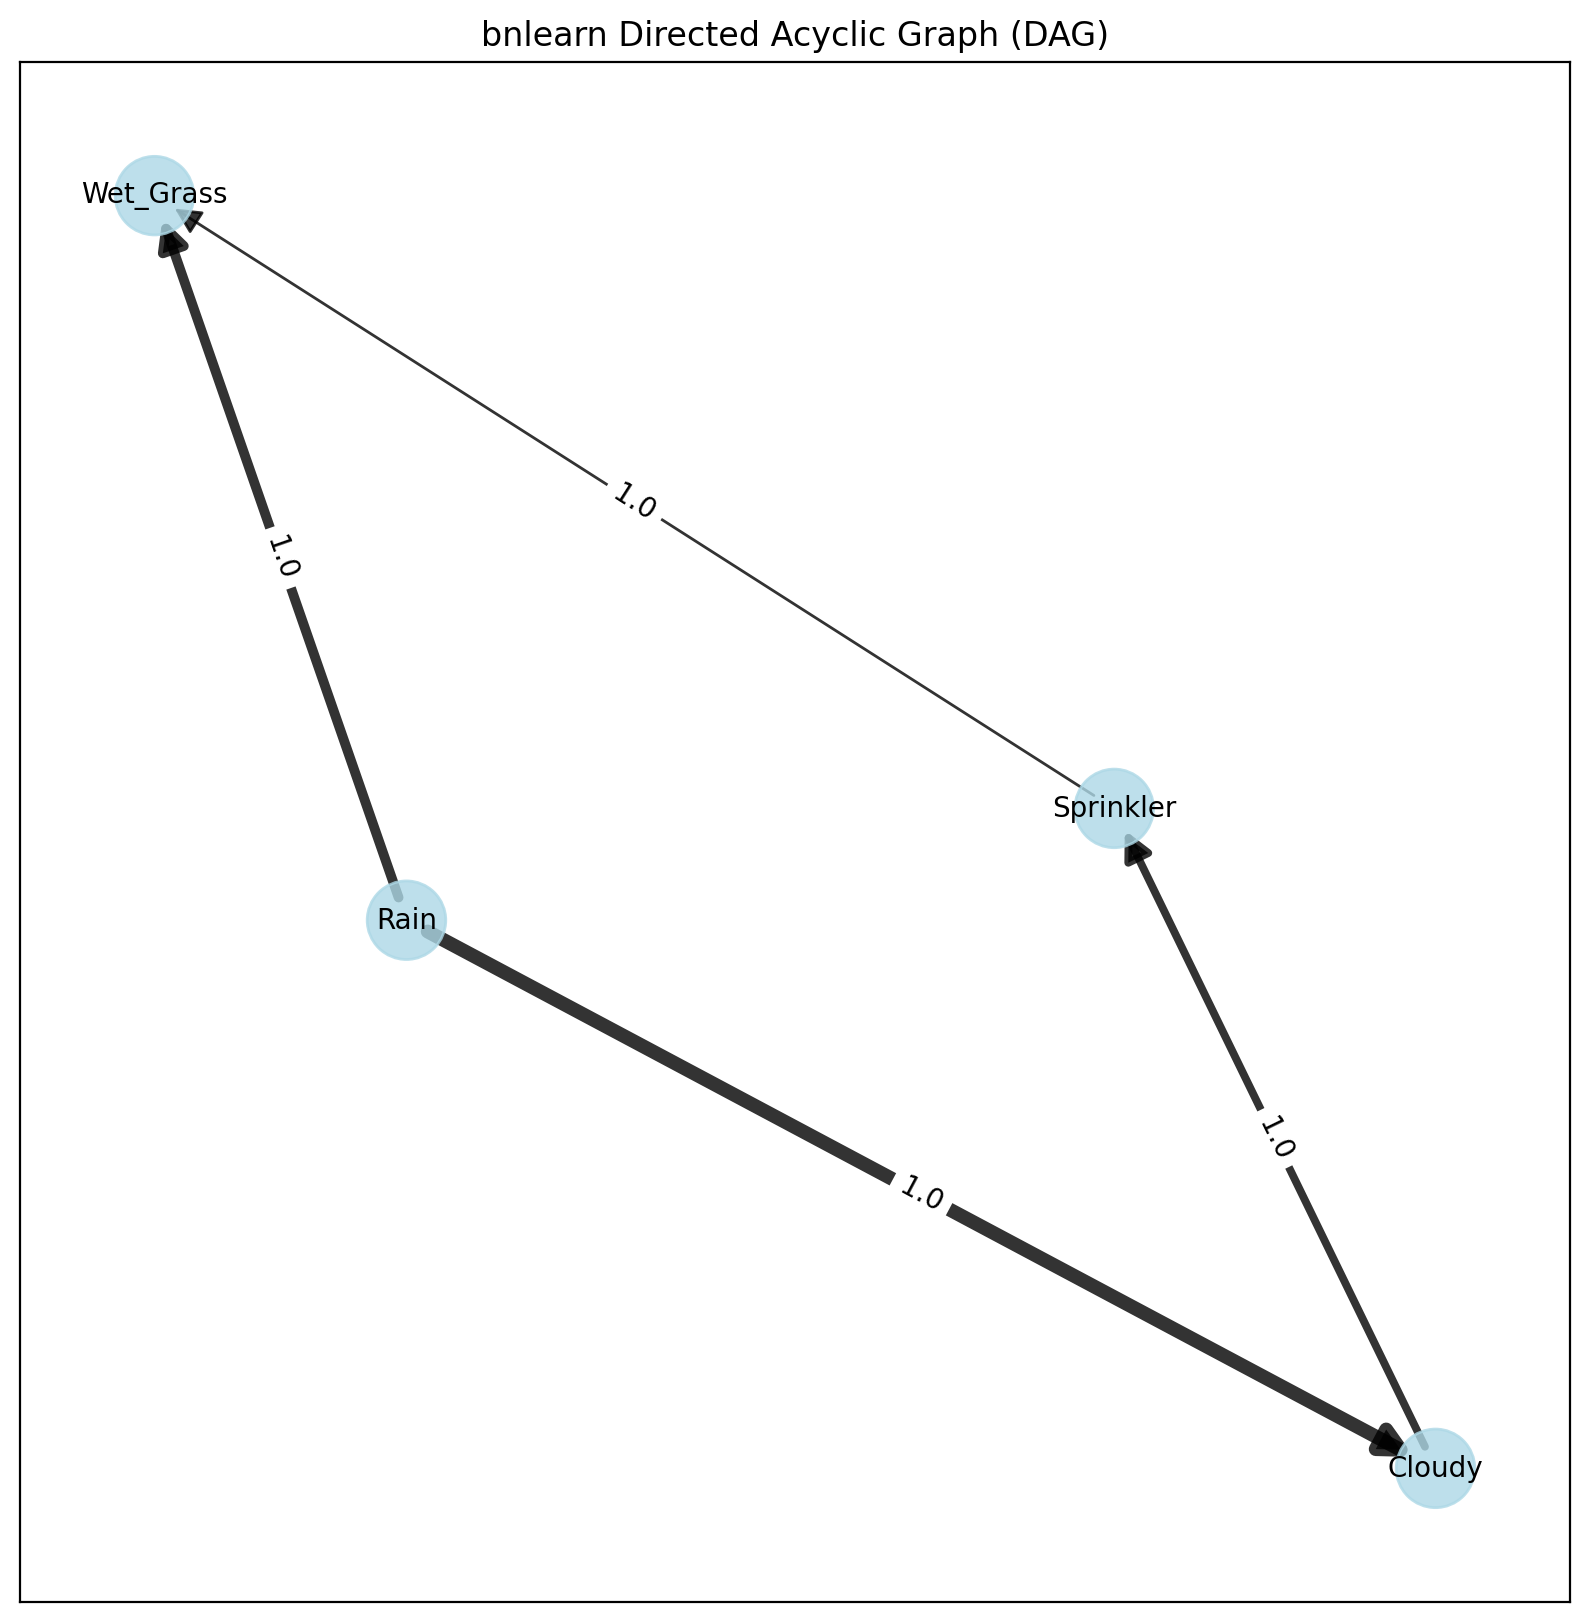

In [5]:
G = bn.plot(model)

In [10]:
model = bn.import_DAG('sprinkler')
model

[bnlearn] >Import <sprinkler>
[bnlearn] >Check whether CPDs sum up to one.


{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x263bfb99b50>,
 'adjmat': target     Cloudy  Sprinkler   Rain  Wet_Grass
 source                                        
 Cloudy      False       True   True      False
 Sprinkler   False      False  False       True
 Rain        False      False  False       True
 Wet_Grass   False      False  False      False}

In [9]:
df = bn.import_example()
df

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


In [11]:
df = bn.sampling(model)
df

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,1,0,1
1,0,0,1,1
2,1,0,0,0
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
995,0,0,0,0
996,0,0,0,0
997,0,1,0,1
998,0,1,0,1


In [12]:
query = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1, 'Wet_Grass':1})
print(query.df)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   Rain |         p |
+====+========+===========+
|  0 |      0 | 0.0241546 |
+----+--------+-----------+
|  1 |      1 | 0.975845  |
+----+--------+-----------+
   Rain         p
0     0  0.024155
1     1  0.975845


In [13]:
model_sl = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [14]:
model_pl = bn.parameter_learning.fit(model_sl, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cloudy:
+-----------+---------------------+---------------------+
| Rain      | Rain(0)             | Rain(1)             |
+-----------+---------------------+---------------------+
| Cloudy(0) | 0.6282926829268293  | 0.37333333333333335 |
+-----------+---------------------+---------------------+
| Cloudy(1) | 0.37170731707317073 | 0.6266666666666667  |
+-----------+---------------------+---------------------+
[bnlearn] >CPD of Sprinkler:
+--------------+---------------------+--------------------+
| Cloudy       | Cloudy(0)           | Cloudy(1)          |
+--------------+---------------------+--------------------+
| Sprinkler(0) | 0.5059523809523809  | 0.7066532258064516 |
+--------------+---------------------+--------------------+
| Sprinkler(1) | 0.49404761904761907 | 0.2933

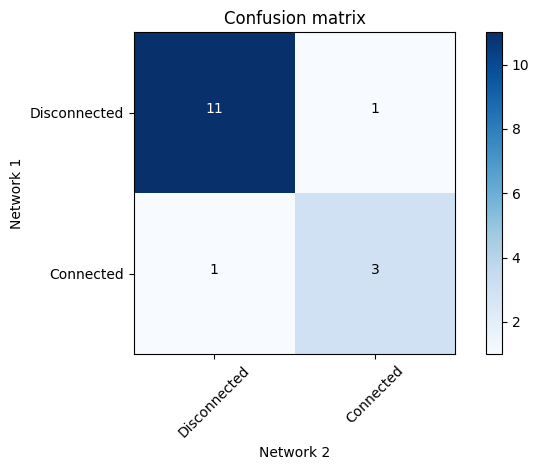

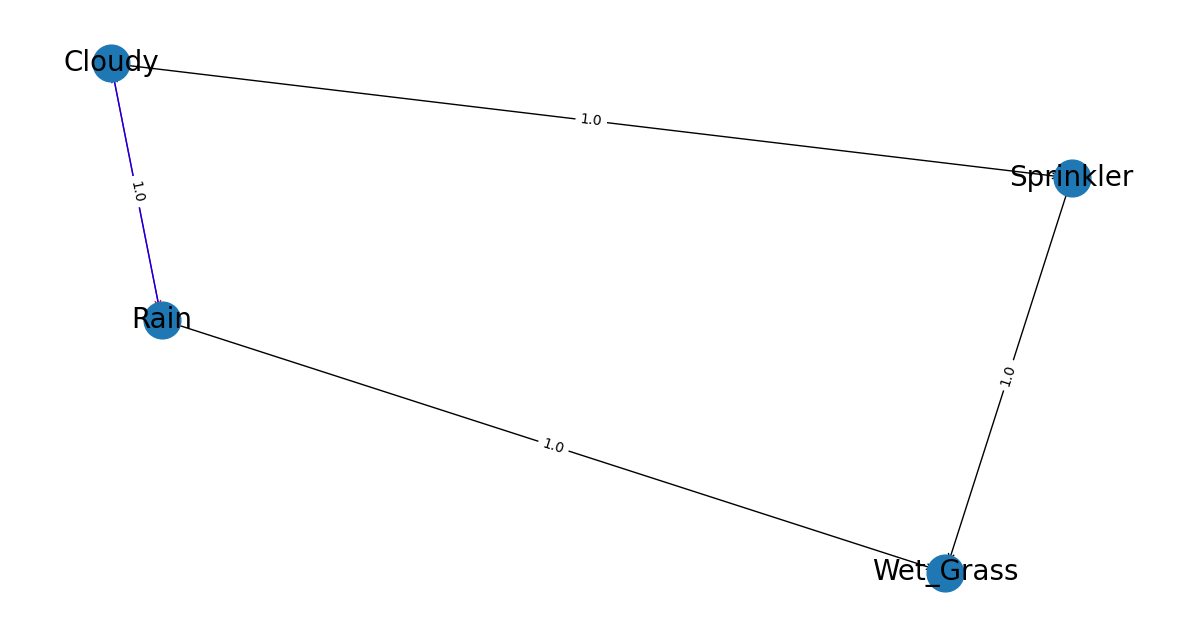

In [15]:
scores, adjmat = bn.compare_networks(model_sl, model)